In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsdf

In [8]:
df = pd.read_csv('/Users/pintoza/Desktop/dev/data-science/sales_optimization/data/processed/df_processed.csv')

df.head()

,order_number,sales_channel,warehouse_code,procured_date,order_date,ship_date,delivery_date,sales_team_id,customer_id,store_id,product_id,order_quantity,discount_applied,unit_cost,unit_price
0,101,In-Store,4,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,5,0.075,1001,1963
1,102,Online,3,2017-12-31,2018-05-31,2018-06-22,2018-07-02,14,20,196,27,3,0.075,3349,3940
2,103,Distributor,4,2017-12-31,2018-05-31,2018-06-21,2018-07-01,21,16,213,16,1,0.050,781,1776
3,104,Wholesale,3,2017-12-31,2018-05-31,2018-06-02,2018-06-07,28,48,107,23,8,0.075,1465,2325
4,105,Distributor,3,2018-04-10,2018-05-31,2018-06-16,2018-06-26,22,49,111,26,8,0.100,1476,1822


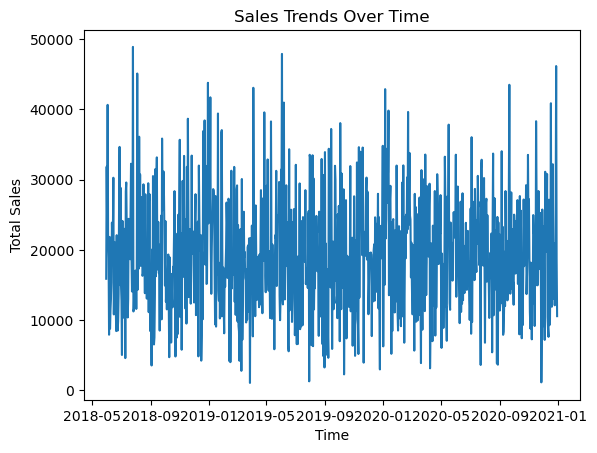

In [11]:
df['order_date'] = pd.to_datetime(df['order_date'])
time_series_df = df.groupby('order_date')['unit_price'].sum().reset_index()

plt.plot(time_series_df['order_date'], time_series_df['unit_price'])
plt.title('Sales Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/Sales_Trends_Over_Time.png')

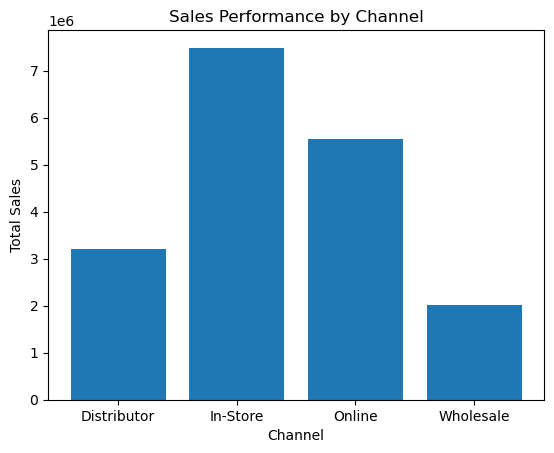

In [12]:
channel_df = df.groupby('sales_channel')['unit_price'].sum().reset_index()

plt.bar(channel_df['sales_channel'], channel_df['unit_price'])
plt.title('Sales Performance by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Sales')

plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/Sales_Performance_by_Channel.png')

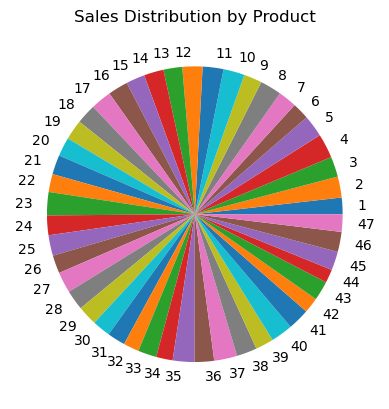

In [13]:
product_df = df.groupby('product_id')['unit_price'].sum().reset_index()

plt.pie(product_df['unit_price'], labels=product_df['product_id'])
plt.title('Sales Distribution by Product')

plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/Sales_Distribution_by_Product.png')

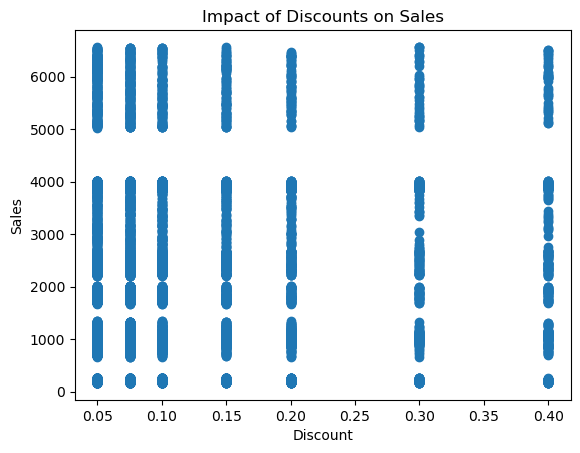

In [14]:
plt.scatter(df['discount_applied'], df['unit_price'])
plt.title('Impact of Discounts on Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')

plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/Impact_of_Discounts_on_Sales.png')